## Importing the libraries and the dataset 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
data.drop(['LoanID'], axis = 1, inplace  = True)
#data.drop(['HasCoSigner'], axis = 1, inplace  = True)

In [4]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
x

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No


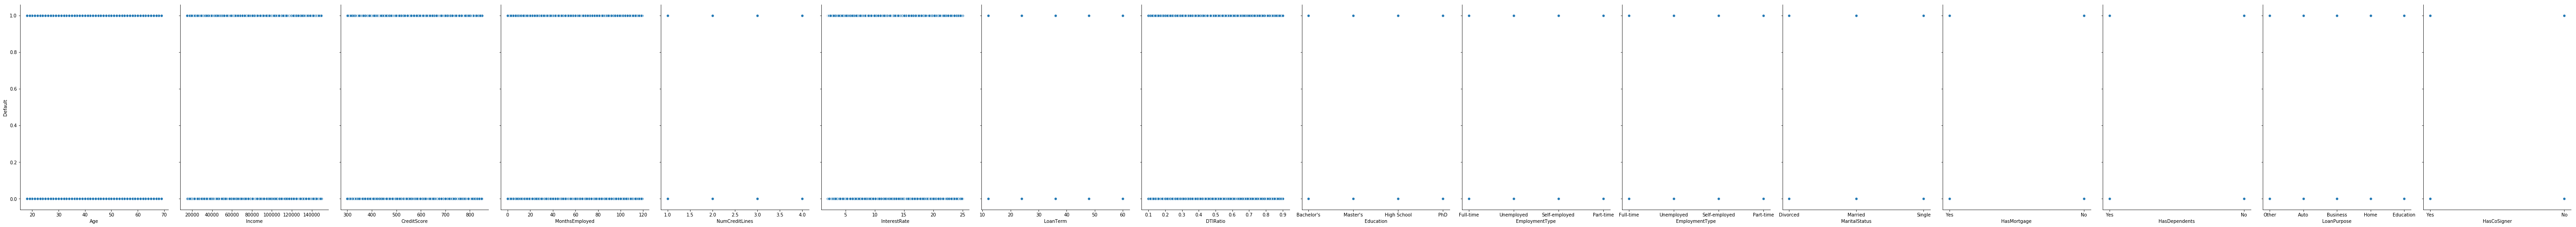

In [48]:
p = sns.pairplot(data, x_vars = ['Age','Income','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio','Education','EmploymentType','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'], y_vars =['Default'], size = 7,aspect = 0.7)

## Multicollinearity test

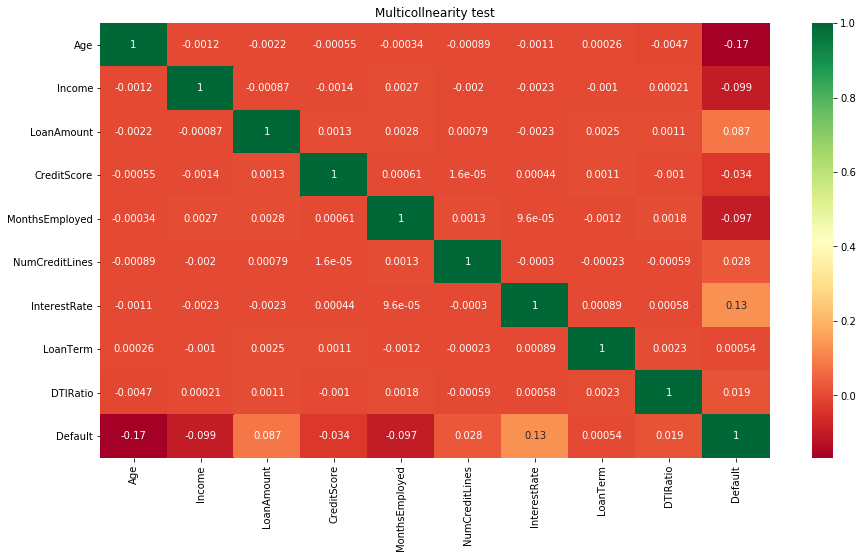

In [6]:
plt.figure(figsize = [15 ,8])
plt.title('Multicollnearity test')
p = sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

## EDA

## Checking null values

In [7]:
data.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## No null values in the dataset

## Seperating categorical and numerical variables 

In [8]:
categorical = [var for var in  data.columns if data[var].dtype == 'O']
numerical = [var for var in  data.columns if data[var].dtype != 'O'] 
data[categorical].head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [9]:
data[numerical].head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


## Checking for outliers

In [10]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## There are no outliers in the dataset

## Splitting the dataset into training and testing set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [12]:
x_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
151646,65,92739,180971,753,52,3,3.79,24,0.87,PhD,Part-time,Divorced,Yes,No,Auto,Yes
193529,62,93980,118534,669,1,1,13.94,24,0.81,Bachelor's,Self-employed,Married,Yes,No,Other,Yes
140818,39,127925,76852,438,24,3,18.33,36,0.11,High School,Part-time,Divorced,No,No,Business,No
165537,37,59841,69792,458,37,2,4.24,24,0.23,PhD,Part-time,Single,Yes,No,Home,No
84290,56,135781,231125,782,9,1,2.06,48,0.39,PhD,Full-time,Married,Yes,Yes,Home,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,42,20214,30954,753,62,2,7.29,24,0.86,Master's,Unemployed,Married,No,No,Education,No
117952,52,69377,231669,494,55,4,21.03,24,0.75,Master's,Part-time,Married,No,Yes,Other,No
173685,54,105794,109969,656,3,1,13.03,12,0.72,PhD,Self-employed,Divorced,Yes,No,Other,Yes
43567,59,28111,49733,609,45,1,4.37,24,0.77,Bachelor's,Unemployed,Single,Yes,No,Auto,No


In [13]:
x_test

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
91816,56,109663,107028,498,9,3,18.48,12,0.45,High School,Self-employed,Married,Yes,Yes,Auto,No
140989,56,129151,233093,610,48,3,10.03,36,0.51,Master's,Unemployed,Married,No,No,Other,No
57275,34,43087,162002,623,31,2,22.26,60,0.58,Bachelor's,Part-time,Married,Yes,Yes,Education,Yes
130235,40,63747,120320,590,14,3,4.73,60,0.13,PhD,Full-time,Married,No,No,Business,Yes
244648,48,124406,222023,784,106,3,9.82,24,0.42,High School,Full-time,Single,Yes,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25404,25,82577,31728,333,22,1,22.89,60,0.26,Bachelor's,Full-time,Divorced,No,No,Business,Yes
231940,30,47272,48457,385,34,4,3.53,12,0.19,PhD,Full-time,Divorced,No,Yes,Auto,Yes
184407,55,22164,30105,390,77,3,18.96,36,0.24,Bachelor's,Self-employed,Married,Yes,Yes,Other,Yes
60091,68,52404,83642,527,94,3,22.57,24,0.54,Master's,Self-employed,Single,No,No,Education,Yes


## Encoding categorical variables

In [14]:
data[categorical].head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [15]:
x_train = pd.get_dummies(x_train, columns = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'])
x_test = pd.get_dummies(x_test, columns = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner'])

In [16]:
x_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
151646,65,92739,180971,753,52,3,3.79,24,0.87,0,...,1,1,0,1,0,0,0,0,0,1
193529,62,93980,118534,669,1,1,13.94,24,0.81,1,...,1,1,0,0,0,0,0,1,0,1
140818,39,127925,76852,438,24,3,18.33,36,0.11,0,...,0,1,0,0,1,0,0,0,1,0
165537,37,59841,69792,458,37,2,4.24,24,0.23,0,...,1,1,0,0,0,0,1,0,1,0
84290,56,135781,231125,782,9,1,2.06,48,0.39,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,42,20214,30954,753,62,2,7.29,24,0.86,0,...,0,1,0,0,0,1,0,0,1,0
117952,52,69377,231669,494,55,4,21.03,24,0.75,0,...,0,0,1,0,0,0,0,1,1,0
173685,54,105794,109969,656,3,1,13.03,12,0.72,0,...,1,1,0,0,0,0,0,1,0,1
43567,59,28111,49733,609,45,1,4.37,24,0.77,1,...,1,1,0,1,0,0,0,0,1,0


In [17]:
cols = x_train.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

# Defining the parameter distribution
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto'],
    'bootstrap': [True]
}

In [19]:
# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

In [20]:

# Set up the RandomizedSearchCV 
random_search = RandomizedSearchCV(
    estimator=rf,       #selecting the model (random forest)
    param_distributions=param_dist,   
    n_iter=20,          #defining number of iterations (20)
    cv=3,               #defining number of cross validations (3)
    random_state=42,
    n_jobs=1            #keeping no of jobs to run parallel at 1 for low strain on the PC
)

In [21]:

x_train_sample = x_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.sample(frac=0.1, random_state=42)

In [22]:
#using the samples bc our dataset is over 200000 rows which is computinally expensive and takes long to execute
random_search.fit(x_train_sample, y_train_sample)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027784199A90>,
                                        'max_features': ['auto'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027790249748>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000277902495F8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027784199E80>},
                   random_state=42)

In [23]:

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")


Best parameters: {'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 63}
Best cross-validation score: 0.8865283035388293


## Checking for overfitting and underfitting 

In [24]:

# Get the best model from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Fit the best model to the full training data
best_rf.fit(x_train, y_train)

# Evaluate the best model on the training set
train_score = best_rf.score(x_train, y_train)
print(f"Training set score: {train_score}")

# Evaluate the best model on the test set
test_score = best_rf.score(x_test, y_test)
print(f"Test set score: {test_score}")



Training set score: 0.8961997679621299
Test set score: 0.8833365968278833


In [25]:
y_pred = random_search.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Confusion matrix 

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')

[[45003    59]
 [ 5899   109]]
Accuracy score is 0.8833365968278833


## Classification accuracy and error

In [27]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [28]:
classification_accuracy = (TP + TN) / float (TP + TN + FP + FN)
print(f'Classification accuracy is {classification_accuracy:0.4f}')

Classification accuracy is 0.8833


In [29]:
classification_error = (FP + FN) / float (TP + TN + FP + FN)
print(f'Classification error is {classification_error:0.4f}')

Classification error is 0.1167


## Precision

In [30]:
precision = TP / float (TP+FP)
print(f'precision = {precision:0.4f}')

precision = 0.9987


## Recall

In [31]:
recall = TP / float (TP + FN)
print(f'Recall or sensitivity is {recall:.4f}')

Recall or sensitivity is 0.8841


## ROC AUC score

In [32]:
y_pred1 = random_search.predict_proba(x_test)[:,1]
y_pred1

array([0.08315756, 0.06508472, 0.2624774 , ..., 0.06123035, 0.05719956,
       0.05982085])

In [33]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,y_pred1)
print(f'ROC-AUC score is {ROC_AUC:.4}')

ROC-AUC score is 0.7446


## F1 Score

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45062
           1       0.65      0.02      0.04      6008

    accuracy                           0.88     51070
   macro avg       0.77      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070

